In [ ]:
# Department: ESTSOFT
# Class: AI Modelling
# Category: Machine learning
# Title: Antarctic glacier analysis
# Contributors: Kimm Soo Min
# Last modified date: 12/05/25

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
from sklearn.metrics import mean_squared_error

In [2]:
path_1 = "/Users/somnio.kimm/Library/CloudStorage/GoogleDrive-somnio.kimm@gmail.com/My Drive/Class/ESTSOFT/project/time_series_analysis/data/southern_hemisphere/image_teaching"
path_2 = "/Users/somnio.kimm/Library/CloudStorage/GoogleDrive-somnio.kimm@gmail.com/My Drive/Class/ESTSOFT/project/time_series_analysis/data/southern_hemisphere/image_autoregressive"


In [3]:
def grab_images(folder):
	return sorted([os.path.join(folder, file) for file in os.listdir(folder) if file.endswith('.png')])

In [ ]:
img_paths = grab_images(path_1)
pred_1_paths = sorted([path for path in img_paths if '/pred_' in path])
true_paths = sorted([path for path in img_paths if '/true_' in path])
pred_2_paths = grab_images(path_2)

In [9]:
# Read the images
img_orig = [Image.open(path) for path in true_paths]
img_teaching = [Image.open(path) for path in pred_1_paths]
img_autoregressive = [Image.open(path) for path in pred_2_paths]

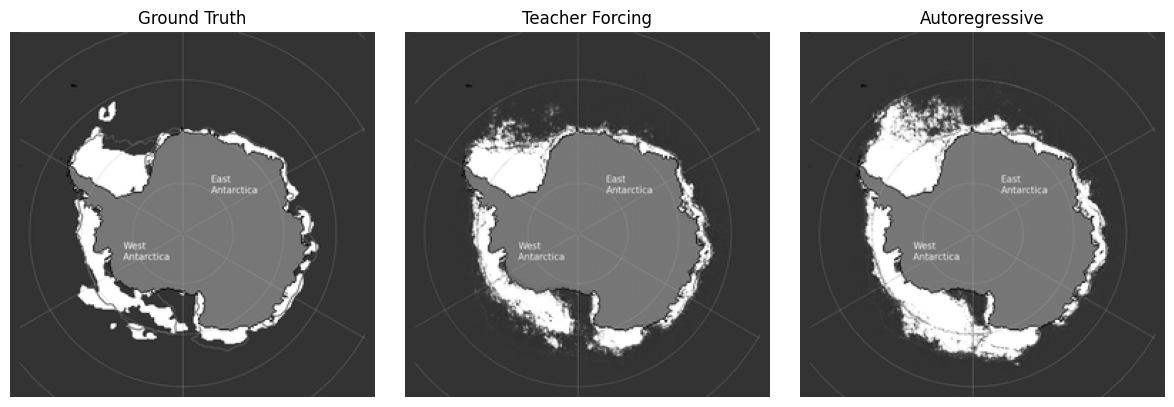

In [ ]:
idx = 22
plt.figure(figsize=(12, 4))

# Ground Truth
plt.subplot(1, 3, 1)
plt.imshow(img_orig[idx], cmap='gray')
plt.title("Ground Truth")
plt.axis('off')

# Teacher Forcing
plt.subplot(1, 3, 2)
plt.imshow(img_teaching[idx], cmap='gray')
plt.title("Teacher Forcing")
plt.axis('off')

# Autoregressive
plt.subplot(1, 3, 3)
plt.imshow(img_autoregressive[idx], cmap='gray')
plt.title("Autoregressive")
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Convert PIL image to numpy array
def to_array(img):
    return np.array(img).astype(np.float32) / 255.0  # Normalize to [0,1] 

img_1 = to_array(img_orig[idx])
img_2 = to_array(img_teaching[idx])
img_3 = to_array(img_autoregressive[idx])

# Compute MSE
mse_teaching = mean_squared_error(img_1.flatten(), img_2.flatten())
mse_autoregressive = mean_squared_error(img_1.flatten(), img_3.flatten())

print(f"MSE (Teacher Forcing): {mse_teaching:.6f}")
print(f"MSE (Autoregressive): {mse_autoregressive:.6f}")